In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
# df=pd.read_csv("C:/Users/PHANEENDRA/Downloads/kaggle.csv",index_col=0)
# df

In [4]:
df1=pd.read_csv(r"C:\Users\PHANEENDRA\Downloads\kaggle.csv",index_col=0)
df1

,url,result,label
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0
...,...,...,...
632503,xbox360.ign.com/objects/850/850402.html,malicious,1
632504,games.teamxbox.com/xbox-360/1860/Dead-Space/,malicious,1
632505,www.gamespot.com/xbox360/action/deadspace/,malicious,1
632506,en.wikipedia.org/wiki/Dead_Space_(video_game),malicious,1


In [8]:
# here label = 0 means not_spam
# and label = 1 means spam

In [8]:
df2=pd.read_csv(r"C:\Users\PHANEENDRA\Downloads\ebbu.csv",index_col=0)
df2

,url,label
0,http://www.conceptdraw.com/How-To-Guide/Local-...,0
1,https://www.edrawsoft.com/Local-Area-Network.php,0
2,http://www.webopedia.com/TERM/L/local_area_net...,0
3,https://www.acsac.org/secshelf/book001/16.pdf,0
4,http://www.diffen.com/difference/LAN_vs_WAN,0
...,...,...
73570,http://www.grupolyl.com/slap/GD/,1
73571,http://bcgroup-sa.com/nilalalaa/GD/index.php,1
73572,http://mainepta.org/eme/gm/excel/excel/excel.p...,1
73573,http://support.escola-olivera.org/GOOGLENEWW/G...,1


In [10]:
df3=pd.read_csv(r"C:\Users\PHANEENDRA\Downloads\iscx.csv",index_col=0)
df3

,url,label
0,http://1337x.to/torrent/1048648/American-Snipe...,0
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,0
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,0
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,0
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,0
...,...,...
45338,http://highedgesolar.com/nw/includes/,1
45339,http://jimfangimporters.yolasite.com/,1
45340,http://liuheng.chengxuren.com/Images/,1
45341,http://mcnaotempreco.net/site/portal/,1


In [12]:
df1=df1.drop(columns='result')

In [14]:
# List of CSV file paths
file_list = [df1,df2,df3]

# Read and concatenate them
df = pd.concat(file_list, ignore_index=True)

df = df.drop_duplicates().reset_index().drop(columns='index')

df

,url,label
0,https://www.google.com,0
1,https://www.youtube.com,0
2,https://www.facebook.com,0
3,https://www.baidu.com,0
4,https://www.wikipedia.org,0
...,...,...
712409,https://lastpass.com/signup2.php?ac=1&from_uri...,0
712410,https://lastpass.com/signup2.php?ac=1&from_uri...,0
712411,https://asana.com/guide/videos/%22//fast.wisti...,0
712412,http://memil.kr/bbs/data/ebay.comm/sq1/sq/inde...,1


In [16]:
# Optionally, save to a new CSV
df.to_csv('final_labelled_URLs.csv',index=False)

In [34]:
# x=pd.read_csv(r"C:\Users\PHANEENDRA\cranes\ML_Project_11June\final_labelled_URLs.csv")
# x

In [20]:
df.isnull().sum()

url      0
label    0
dtype: int64

In [22]:
df.duplicated().sum()

0

In [24]:
df['url'].nunique()

712414

In [26]:
df['label'].nunique()

2

**Feature Extraction**       
- Feature extraction plays a vital role in characterizing the data in any machine learning model.
- Features are chosen for the purpose of detection while carefully encapsulating various dimensions of URL attributes that aid in differentiating phishing and benign URLs.
- The features capture structural, content-based and behavioural characteristics.

**Structural Features: has listed detailed rules of some Structural Features**            
• Hostname Length: Measures the length of the URL’s hostname.               
• URL Length: Represents the overall length of the URL.                           
• Path Length: Quantifies the length of the URL’s path component.                                 
• fd length : first directory in the path of a URL                            
• Count of Directories (count dir): Measures the number of directories in the URL’s path.                    
                                 
**Content-Based Features: has given a perspective about content based features**                         
• Count of Special Characters (spcl char): Tracks the occurrence of special characters in the URL.                           
• Count of ’http’ and ’https’: Captures the presence of ’http’ and ’https’ in the URL.                         
• Count of ’www’: Indicates the existence of the ’www’ subdomain.                           
• Count of Digits: Quantifies the occurrence of numerical digits in the URL.                  
                                                              
**Behavioral Features: gave insights on NLP features**                                 
• Path Entropy: Represents the entropy of the URL’s path, measuring its randomness.                                       
• True subdomain Count: To count only the subdomains, and ignore the main domain and TLD in the URL                                  
                                
- These features collectively offer insights into diverse URL attributes, encompassing length, structure, composition, and behavior.
- They aim to capture distinct characteristics associated with phishing URLs, aiding machine learning models in distinguishing between legitimate and malicious URLs based on these attributes.
- I have extracted these features through analysing several research papers and also from the exploratory data analysis done on the data set during the data preprocessing phase.
- EDA enabled me to know more about how these features vary on the different classes of data.

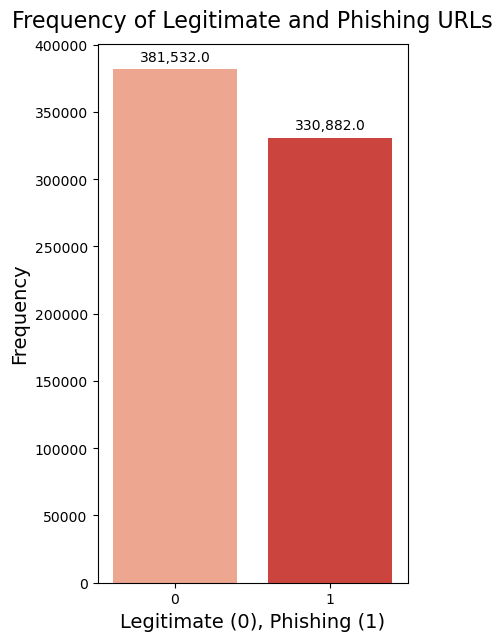

In [118]:
plt.figure(figsize = (4, 7))        
bar = sns.countplot(x=df["label"], 
              data=df, 
              palette="Reds")
for p in bar.patches:
    bar.annotate(format(p.get_height(), ','),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Frequency of Legitimate and Phishing URLs', fontsize = 16, pad = 12)
plt.xlabel('Legitimate (0), Phishing (1)', fontsize = 14)
plt.ylabel("Frequency",fontsize = 14)
plt.show();

The returned object bar is a matplotlib Axes with bar containers (bar.patches).
| Part                                               | Meaning                                                                          |
| -------------------------------------------------- | -------------------------------------------------------------------------------- |
| `format(p.get_height(), ',')`                      | Gets the height (count) of the bar and formats it with commas (e.g., `1,000`)    |
| `(p.get_x() + p.get_width() / 2., p.get_height())` | Places the text at the **center top of the bar**                                 |
| `ha='center', va='center'`                         | Aligns the text horizontally and vertically to the center of that point          |
| `xytext=(0, 9)`                                    | Moves the text **9 points up** from the bar top so it doesn’t sit directly on it |
| `textcoords='offset points'`                       | Tells matplotlib to use **points** as the unit for the offset                    |


In [51]:
for p in bar.patches:
    print(p)

Rectangle(xy=(-0.4, 0), width=0.8, height=381532, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=330882, angle=0)


In [121]:
from urllib.parse import urlparse

In [123]:
# URL Length: Represents the overall length of the URL.
df['url_length'] = df['url'].apply(lambda i: len(str(i)))

In [127]:
# Hostname Length: Measures the length of the URL’s hostname.
df['hostname_length'] = df['url'].apply(lambda i: len(urlparse(i).netloc))

In [133]:
# Path Length: Quantifies the length of the URL’s path component.
df['path_length'] = df['url'].apply(lambda i: len(urlparse(i).path))

In [136]:
# fd length : length of first directory in the path of a URL
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

In [165]:
# Count of Directories (count dir): Measures the number of directories in the URL’s path.
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

In [141]:
# Query Length: Quantifies the length of the URL’s query component.
df['query_length'] = df['url'].apply(lambda i: len(urlparse(i).query))

In [153]:
df['query_length'].value_counts()

query_length
0       571934
13       10991
47        4993
7         3980
8         3457
         ...  
701          1
834          1
626          1
431          1
2005         1
Name: count, Length: 597, dtype: int64

In [145]:
# Params Length: Quantifies the length of the URL’s params component.
df['params_length'] = df['url'].apply(lambda i: len(urlparse(i).params))

In [151]:
df['params_length'].value_counts()

params_length
0      712178
61         83
43         16
17         10
1          10
        ...  
73          1
101         1
92          1
96          1
34          1
Name: count, Length: 61, dtype: int64

In [155]:
df=df.drop(columns='params_length')

In [159]:
# Fragment Length: Quantifies the length of the URL’s fragment component.
df['frag_length'] = df['url'].apply(lambda i: len(urlparse(i).fragment))

In [161]:
df['frag_length'].value_counts()

frag_length
0      711553
24        311
32         58
6          33
5          32
        ...  
102         1
50          1
241         1
153         1
152         1
Name: count, Length: 75, dtype: int64

In [163]:
df=df.drop(columns='frag_length')

In [167]:
characters_to_count = ['-', '@', '?', '%', '.', '=']
df['spcl_char_count'] = df['url'].apply(lambda i: sum(i.count(char) for char in characters_to_count))

df['http_count'] = df['url'].apply(lambda i : i.count('http'))
df['https_count'] = df['url'].apply(lambda i : i.count('https'))
df['www_count'] = df['url'].apply(lambda i: i.count('www'))

def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['digits_count']= df['url'].apply(lambda i: digit_count(i))

| URL                           | H (approx.) | Meaning                             |
| ----------------------------- | ----------- | ----------------------------------- |
| `https://login.com`           | \~-0.35     | Low entropy, simple URL             |
| `https://x9ka0bc2.com/s0as9d` | \~-0.09     | High entropy, possibly obfuscated   |
| `https://google.com/about`    | \~-0.29     | Moderate entropy, likely legitimate |

This formula gives a negative score — closer to -1 means low randomness-likely legimitate, closer to 0 means high randomness-likely phishing.

It's simpler than true Shannon entropy, but still captures diversity/unpredictability in a string.


In [176]:
#Path Entropy: Represents the entropy of the URL’s path, measuring its randomness.
df['path_entropy'] = df['url'].apply(lambda x: -sum([(x.count(c) / len(x))**2 for c in set(x)]))

- Legitimate URLs often have 2 or 3 domain parts.              
- Phishing URLs may have many subdomains to:            
    - Look complex
    - Imitate legitimate sites (e.g., login.paypal.com.fake.com)
- So a high subdomain count can be a red flag.

To count only the subdomains, and ignore the main domain and TLD:            
you can subtract 2 from sub domain count                
This way, www.google.com returns 1 subdomain (www), not 3.

In [185]:
#True subdomain Count: To count only the subdomains, and ignore the main domain and TLD in the URL
def subdomain_count(url):
    netloc = urlparse(url).netloc
    parts = netloc.split('.')
    true_subdomains = [part for part in parts if part != '']
    if len(true_subdomains) > 2:
        return len(true_subdomains) - 2  # exclude domain and TLD
    return 0

df['true_subdomain_count'] = df['url'].apply(lambda i:subdomain_count(i))

In [187]:
df

,url,label,url_length,hostname_length,path_length,fd_length,query_length,count_dir,spcl_char_count,http_count,https_count,www_count,digits_count,path_entropy,true_subdomain_count
0,https://www.google.com,0,22,14,0,0,0,0,2,1,1,1,0,-0.086777,1
1,https://www.youtube.com,0,23,15,0,0,0,0,2,1,1,1,0,-0.081285,1
2,https://www.facebook.com,0,24,16,0,0,0,0,2,1,1,1,0,-0.076389,1
3,https://www.baidu.com,0,21,13,0,0,0,0,2,1,1,1,0,-0.074830,1
4,https://www.wikipedia.org,0,25,17,0,0,0,0,2,1,1,1,0,-0.081600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712409,https://lastpass.com/signup2.php?ac=1&from_uri...,0,1517,12,12,11,1484,1,91,1,1,0,1054,-0.217857,0
712410,https://lastpass.com/signup2.php?ac=1&from_uri...,0,1696,12,12,11,1663,1,97,1,1,0,1204,-0.228372,0
712411,https://asana.com/guide/videos/%22//fast.wisti...,0,2081,9,58,5,2005,8,243,1,1,0,354,-0.044029,0
712412,http://memil.kr/bbs/data/ebay.comm/sq1/sq/inde...,1,53,8,36,3,1,6,4,1,0,0,1,-0.060876,0


In [193]:
num_cols = df.select_dtypes(exclude='object')

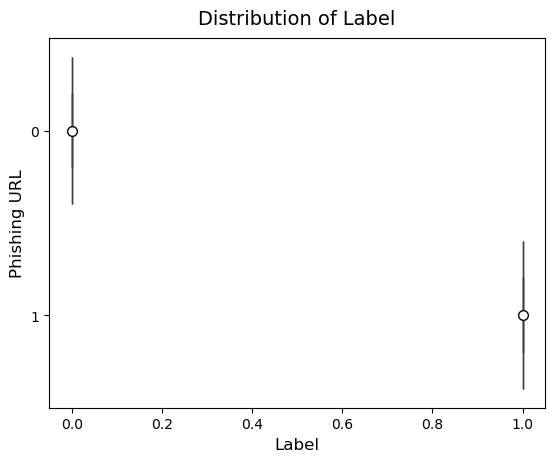

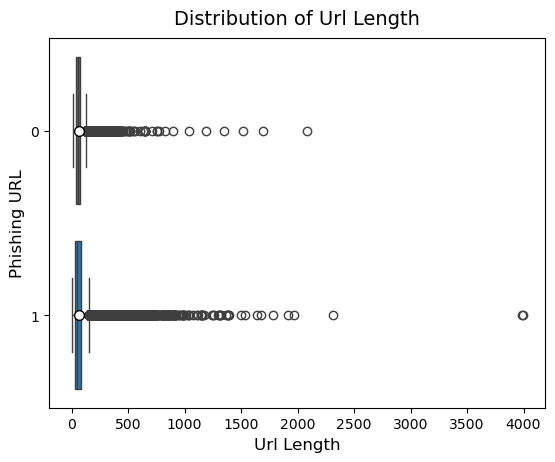

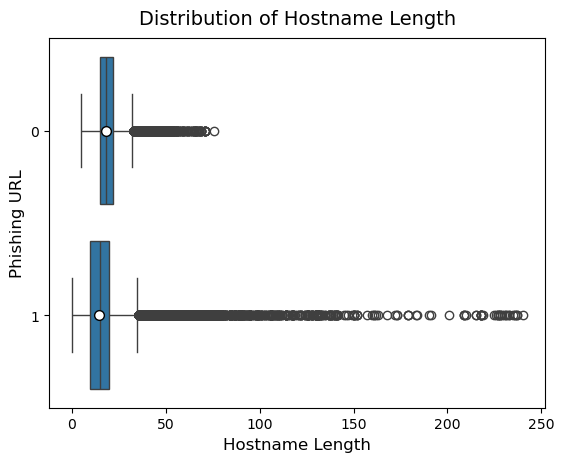

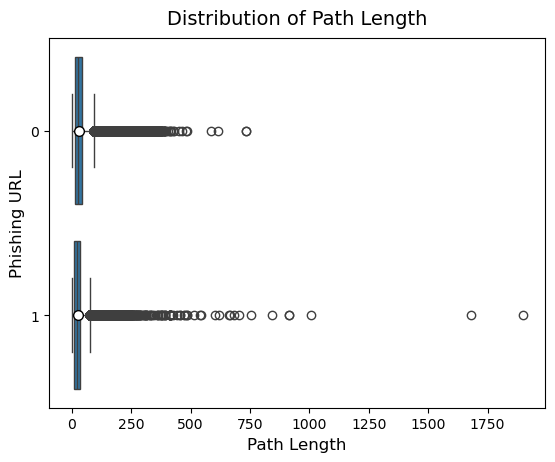

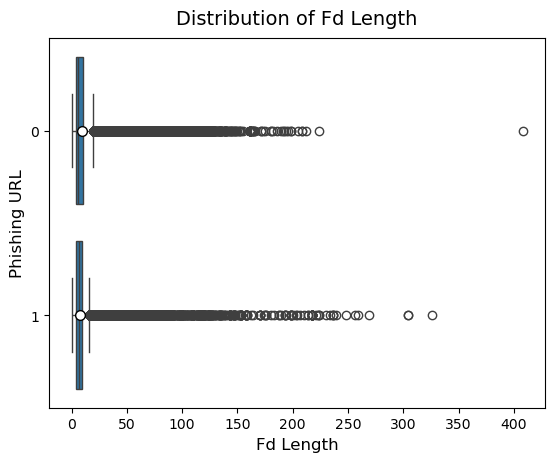

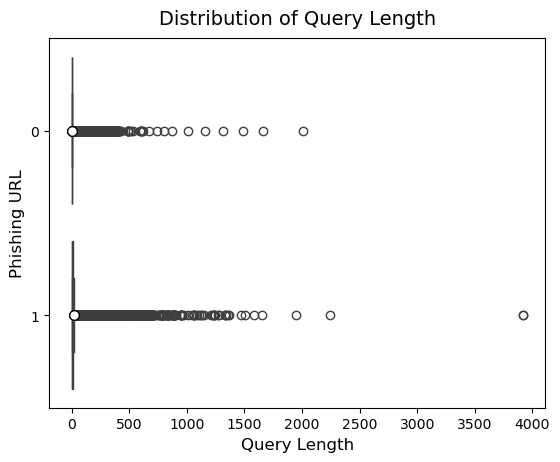

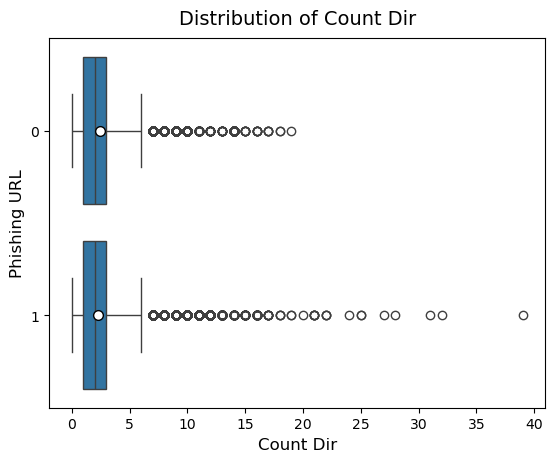

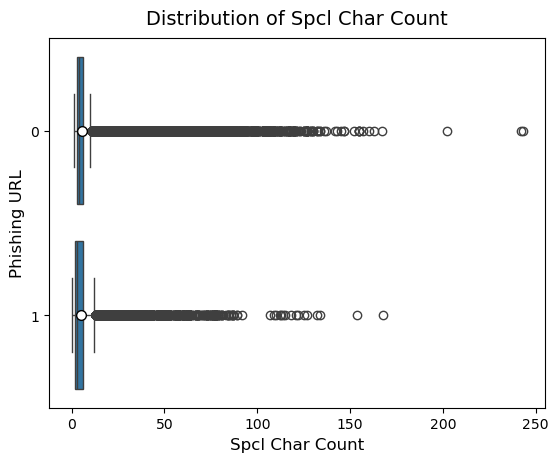

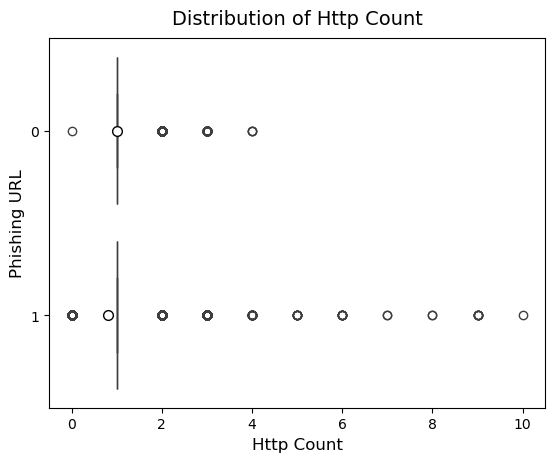

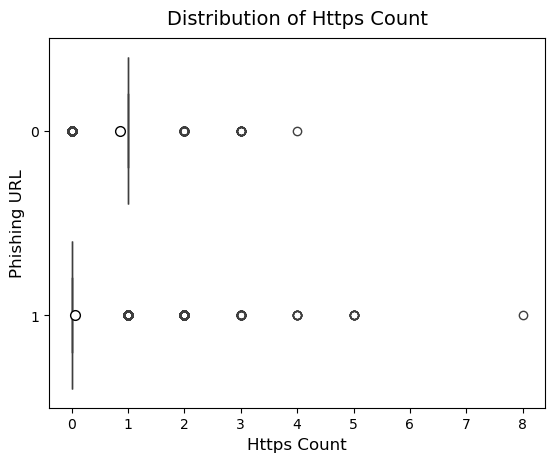

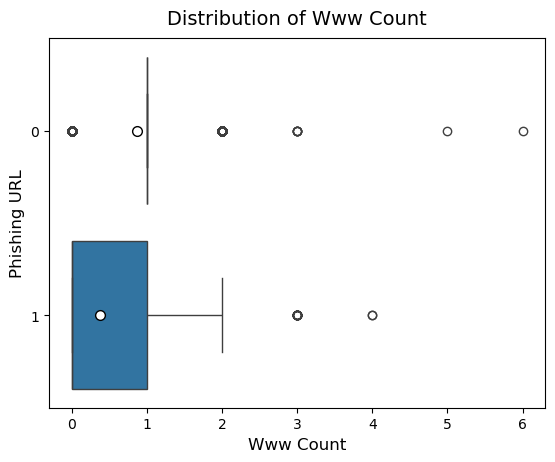

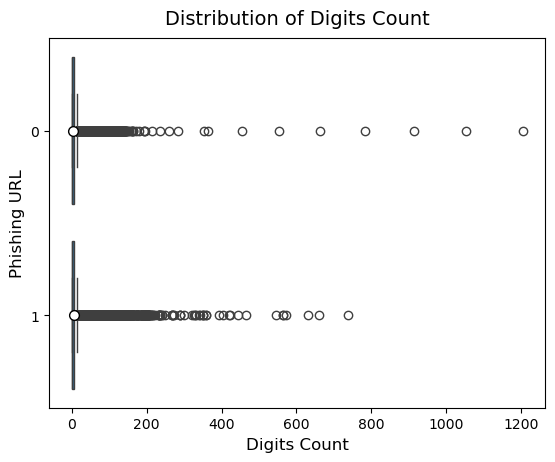

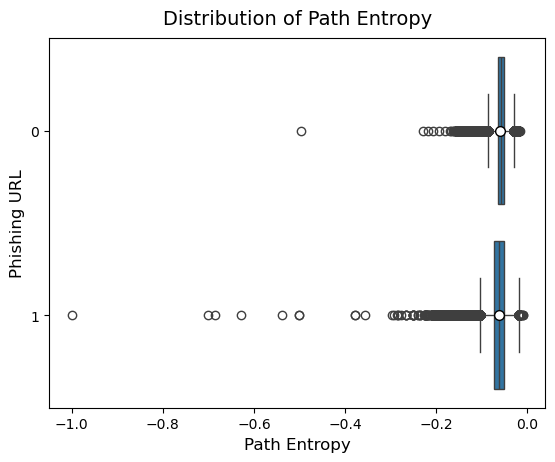

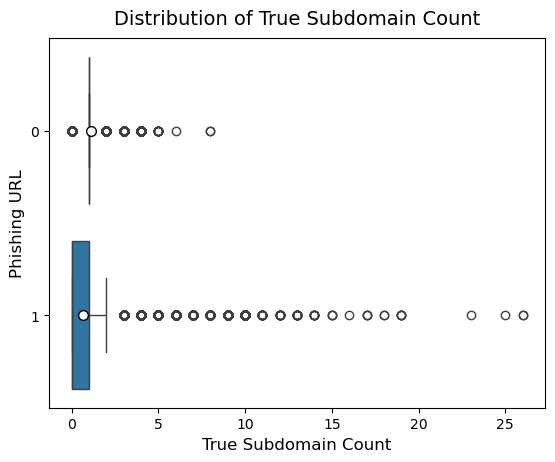

In [195]:
for col in num_cols:
    column_name = col.title().replace('_', ' ')
    title = 'Distribution of ' + column_name
    sns.boxplot(x=df[col],
                y=df['label'],
                data=df,
                orient='h',
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"7"})
    plt.xlabel(column_name, fontsize = 12)
    plt.ylabel('Phishing URL', fontsize = 12)
    plt.title(title, fontsize = 14, pad = 10)
    plt.show()

In [201]:
df_num_cols=df.drop(columns='url')
df_num_cols

,label,url_length,hostname_length,path_length,fd_length,query_length,count_dir,spcl_char_count,http_count,https_count,www_count,digits_count,path_entropy,true_subdomain_count
0,0,22,14,0,0,0,0,2,1,1,1,0,-0.086777,1
1,0,23,15,0,0,0,0,2,1,1,1,0,-0.081285,1
2,0,24,16,0,0,0,0,2,1,1,1,0,-0.076389,1
3,0,21,13,0,0,0,0,2,1,1,1,0,-0.074830,1
4,0,25,17,0,0,0,0,2,1,1,1,0,-0.081600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712409,0,1517,12,12,11,1484,1,91,1,1,0,1054,-0.217857,0
712410,0,1696,12,12,11,1663,1,97,1,1,0,1204,-0.228372,0
712411,0,2081,9,58,5,2005,8,243,1,1,0,354,-0.044029,0
712412,1,53,8,36,3,1,6,4,1,0,0,1,-0.060876,0


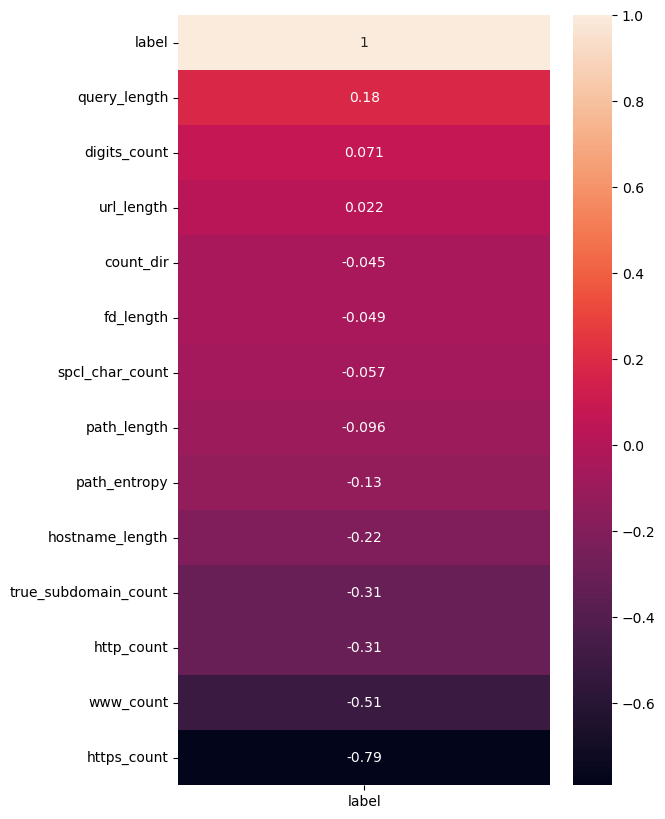

In [209]:
plt.figure(figsize=(6,10))
sns.heatmap(df_num_cols.corr()[['label']].sort_values('label', ascending=False), annot=True);

In [205]:
df

,url,label,url_length,hostname_length,path_length,fd_length,query_length,count_dir,spcl_char_count,http_count,https_count,www_count,digits_count,path_entropy,true_subdomain_count
0,https://www.google.com,0,22,14,0,0,0,0,2,1,1,1,0,-0.086777,1
1,https://www.youtube.com,0,23,15,0,0,0,0,2,1,1,1,0,-0.081285,1
2,https://www.facebook.com,0,24,16,0,0,0,0,2,1,1,1,0,-0.076389,1
3,https://www.baidu.com,0,21,13,0,0,0,0,2,1,1,1,0,-0.074830,1
4,https://www.wikipedia.org,0,25,17,0,0,0,0,2,1,1,1,0,-0.081600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712409,https://lastpass.com/signup2.php?ac=1&from_uri...,0,1517,12,12,11,1484,1,91,1,1,0,1054,-0.217857,0
712410,https://lastpass.com/signup2.php?ac=1&from_uri...,0,1696,12,12,11,1663,1,97,1,1,0,1204,-0.228372,0
712411,https://asana.com/guide/videos/%22//fast.wisti...,0,2081,9,58,5,2005,8,243,1,1,0,354,-0.044029,0
712412,http://memil.kr/bbs/data/ebay.comm/sq1/sq/inde...,1,53,8,36,3,1,6,4,1,0,0,1,-0.060876,0


In [207]:
# Optionally, save to a new CSV
df.to_csv('feature_extracted_URLs.csv',index=False)